In [37]:
from torch.utils.data import random_split, DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

## Initialization dataset to transformation:

- Convert to Grayscale (3 channels)
- Convert to Tensor (convert scale from 0-255 to 0.0-1.0)

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
])

dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

## Dataset split and DataLoader preparation
- Calculate the total dataset size: dataset_size = len(dataset)
- Split the dataset into:
  - train_dataset – 70% of the data
  - val_dataset – 15% of the data
  - test_dataset – remaining 15% of the data
- Create DataLoaders for each split:
  - batch_size=32
  - shuffle=True for the training set
  - num_workers=4 and pin_memory=True for faster data loading
- Print dataset information:
  - number of samples in each split
  - number of classes
  - list of class names


In [39]:
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

classes_str = ", ".join(f"{cls}" for cls in dataset.classes)
print(f"Training samples: {len(train_dataset)} (70%)")
print(f"Validation samples: {len(val_dataset)} (15%)")
print(f"Test samples: {len(test_dataset)} (15%)")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Classes: {classes_str}")

Training samples: 42000 (70%)
Validation samples: 9000 (15%)
Test samples: 9000 (15%)
Number of classes: 10
Classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot


## Sample images from the dataset

- Retrieve a batch of images and labels from the training DataLoader
- Display 10 sample images in a 2x5 grid
- Convert images back to [0,1] range for visualization
- Show corresponding class names as titles

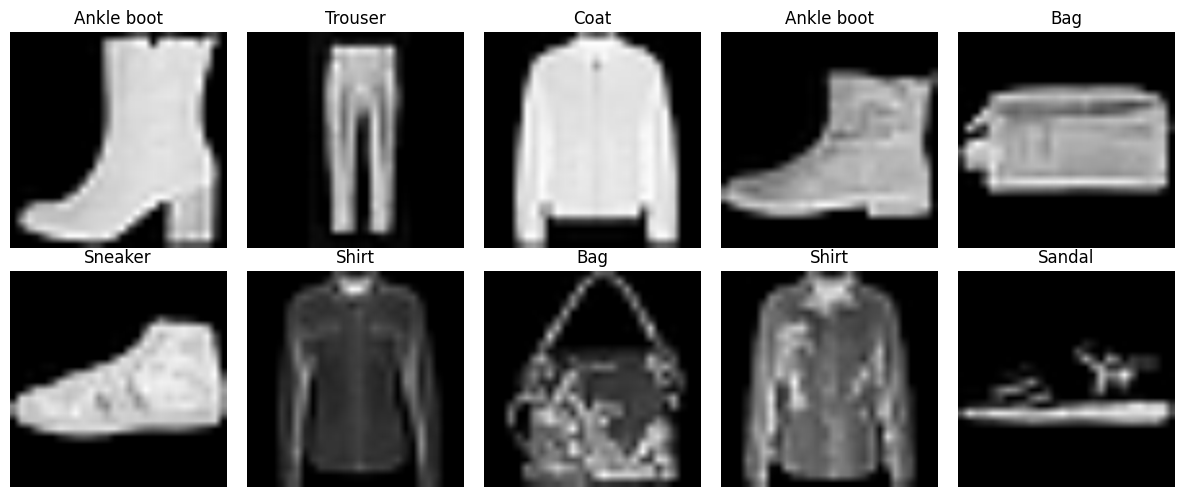

In [40]:
examples, labels = next(iter(train_loader))
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img = examples[i].permute(1, 2, 0) * 0.5 + 0.5
    ax.imshow(img)
    ax.set_title(dataset.classes[labels[i]])
    ax.axis("off")
plt.tight_layout()
plt.show()